### 初期設定

In [1]:
using LinearAlgebra
using Random
using Flux

A = [0.5 0.7; 0.8 1]; #不安定システム
B = [-0.2 0.1; -0.7 -0.6];
C = [0.8 -0.7];

function loss(K, t)
    xt = (A+B*K*C)^t * rand(2, 1)
    return norm(xt)^2
end        

Random.seed!(1)
opt = Flux.ADAM(1e-0)
K = zeros(2, 1);
ps = Flux.params(K)
maxitr = 100
for i in 1:maxitr
    gs = gradient(ps) do
        loss(K, 10)
    end
    Flux.Optimise.update!(opt, ps, gs)
end
display(K)
# display(abs.(eigvals(A)));
display(abs.(eigvals(A + B * K * C)))

2×1 Matrix{Float64}:
 -5.419054855929783
  4.569421183004945

2-element Vector{Float64}:
 1.0384556920711645
 1.0384556920711645

### 深層展開を用いた安定化

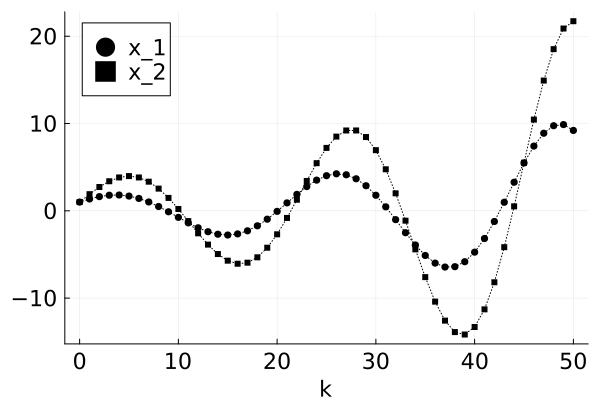

"C:\\Users\\mskog\\Documents\\DU100.pdf"

In [2]:
# visualization
x0 = ones(2, 1);

s = "DU" * string(maxitr) * ".pdf"

function Euler(K, t)
    x_trj = zeros(2, t+1)
    x = x0
    for i in 1:t+1
        x_trj[:,i] = x
        x = (A + B*K*C)*x
    end
    return x_trj[1,:], x_trj[2,:]
end        

using Plots
gr()

fontsize = 15
x1,x2 = Euler(K, 50);
p2 = plot(0:1:50, x1, label="x_1", xlabel="k",color=:black, tickfontsize=fontsize,xtickfontsize=fontsize,xguidefontsize=fontsize,ytickfontsize=fontsize,yguidefontsize=fontsize,legendfontsize=fontsize, st=scatter)
plot!(0:1:50, x1, label="", color=:black, ls=:dot)
plot!(0:1:50, x2, label="x_2",color=:black, ls=:dot, st=scatter, markershape=:square, markersize=3)
plot!(0:1:50, x2, label="", color=:black, ls=:dot)


display(p2)
savefig(s)

### 深層展開と増分学習を用いた安定化

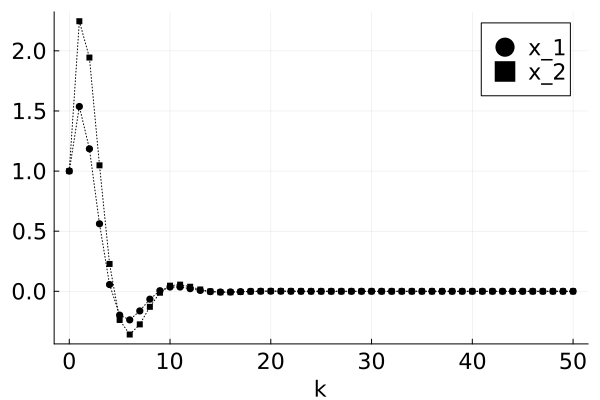

2×1 Matrix{Float64}:
 -12.994934729754405
   7.716774261358207

2-element Vector{Float64}:
 0.678003591351801
 0.678003591351801

"C:\\Users\\mskog\\Documents\\DU_IL100.pdf"

In [3]:
Random.seed!(1)
opt = Flux.ADAM(1e-0) 
K = zeros(2,1)
ps = Flux.params(K)
maxitr = 10
for t in 1:10
    for i in 1:maxitr
        gs = gradient(ps) do
            loss(K, t)
        end
        Flux.Optimise.update!(opt, ps, gs)
    end
end
s = "DU_IL" * string(maxitr*10) * ".pdf"
x1,x2 = Euler(K, 50);
p2 = plot(0:1:50, x1, label="x_1", xlabel="k",color=:black, tickfontsize=fontsize,xtickfontsize=fontsize,xguidefontsize=fontsize,ytickfontsize=fontsize,yguidefontsize=fontsize,legendfontsize=fontsize, st=scatter)
plot!(0:1:50, x1, label="", color=:black, ls=:dot)
plot!(0:1:50, x2, label="x_2",color=:black, ls=:dot, st=scatter, markershape=:square, markersize=3)
plot!(0:1:50, x2, label="", color=:black, ls=:dot)
display(p2)
display(K)
display(abs.(eigvals(A + B * K * C)))
savefig(s)